In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import plotly.plotly as py
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
import locale
import sys  
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from docx.enum.text import WD_LINE_SPACING
from docx.enum.text import WD_ALIGN_PARAGRAPH
import matplotlib.pylab as pylab
from Tkinter import Tk
from tkFileDialog import askopenfilename
import traceback
from docx.oxml.shared import OxmlElement, qn


In [2]:

def set_cell_vertical_alignment(cell, align="center"): 
    try:   
        print("Im at try")
        tc = cell._tc
        tcPr = tc.get_or_add_tcPr()
        tcValign = OxmlElement('w:vAlign')  
        tcValign.set(qn('w:val'), align)  
        tcPr.append(tcValign)
        return True 
    except:
        print("Im at except")
        traceback.print_exc()             
        return False

In [3]:

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/home/tomas/bcra/lecetomas4.xlt


In [4]:
def getValue(df,row,col):
    return df.iloc[row,col]

In [5]:
row_fecha_desde = 1
col_fecha_desde = 3
row_fecha_hasta = 1
col_fecha_hasta = 4
row_rueda = 1
col_rueda = 0
FECHA_DESDE = getValue(pd.read_excel(filename, header = None),row_fecha_desde, col_fecha_desde).split(" ")[2]
FECHA_HASTA = getValue(pd.read_excel(filename, header = None), row_fecha_hasta, col_fecha_hasta).split(" ")[2]
RUEDA = getValue(pd.read_excel(filename, header = None), row_rueda, col_rueda).split(" ")[2]

In [6]:
FECHA_HASTA

u'31/01/2018'

In [7]:
rows_sin_info = [0,1,2,3]
#lecetomas4.xlt
df = pd.read_excel(filename,skiprows= rows_sin_info)

unMillon = float(1000000)

In [8]:
df.columns

Index([u'OP.IN', u'NRO.SIOPEL', u'RUEDA', u'ORIGEN', u'F.CON', u'F.LIQ',
       u'HORA', u'TIPO', u'PLAZO', u'TASA', u'V.NOMINAL', u'PRECIO', u'MONTO',
       u'CONTRAPARTE', u'CD CONTRAPARTE', u'MONEDA', u'ESTADO', u'ESPECIE',
       u'MEP', u'USER CARGA', u'FECHA CARGA', u'USER AUT', u'FECHA AUT',
       u'TRANSF.', u'CTA. AGENTE'],
      dtype='object')

In [9]:
banks_with_code = df["CONTRAPARTE"].value_counts().index
#bank_names = get_bank_names(banks_with_code)
plazos = df["PLAZO"].value_counts().index
tipos = df["TIPO"].value_counts().index
especies = df["ESPECIE"].value_counts().index
rueda = df["RUEDA"].value_counts().index[0]

In [10]:
info_subgrupos = {}
operaciones_tot = []
nominales_tot = []
importes_tot = []

In [11]:
def get_name(bank_code):
    comienzo_nombre_banco = 2
    return " ".join(bank_code.split(" ")[comienzo_nombre_banco:])

In [12]:
#for banco in bancos:
#    df_banco_receptor = lece_df_cedente_bcra[lece_df_cedente_bcra["   Ag. Receptor"] == banco]
#    cantidad_operaciones = len(df_banco_receptor)
#    valor_nominal_total = df_banco_receptor["valor nominal"].sum()
#    importe_total = df_banco_receptor["Importe"].sum()
#    operaciones_tot.append(cantidad_operaciones)
#    nominales_tot.append(valor_nominal_total)
#    importes_tot.append(importe_total)
#    info_subgrupos_lece_cedente_bcra[banco] = [cantidad_operaciones, valor_nominal_total, importe_total]
info_bancos = {}
for tipo in tipos:
    for plazo in plazos:
        df_act = df[(df["TIPO"] == tipo) & (df["PLAZO"] == plazo)]
        if len(df_act) == 0:
            continue
        for bank in banks_with_code:
            df_act_bank = df_act[df_act["CONTRAPARTE"] == bank]
            if len(df_act_bank) == 0:
                continue
            valor_nominal_total = df_act_bank["V.NOMINAL"].sum()
            monto_total = df_act_bank["MONTO"].sum()
            cantidad_de_operaciones = len(df_act_bank)
            tasa_promedio = df_act_bank["TASA"].mean()
            if bank not in info_bancos:
                info_bancos[bank] = [(tipo, plazo, cantidad_de_operaciones, ("{0:.4f}".format(valor_nominal_total/unMillon)), ("{0:.4f}".format(monto_total/unMillon)), ("{0:.4f}".format(tasa_promedio)))]
            else:
                info_bancos[bank].append((tipo, plazo ,cantidad_de_operaciones,("{0:.4f}".format(valor_nominal_total/unMillon)), ("{0:.4f}".format(monto_total/unMillon)), ("{0:.4f}".format(tasa_promedio))))

In [13]:
info_especies = {}
for tipo in tipos:
    for plazo in plazos:
        for especie in especies:
            df_act = df[(df["TIPO"] == tipo) & (df["PLAZO"] == plazo) & (df["ESPECIE"] == especie)]
            cantidad_de_operaciones = len(df_act)
            if (cantidad_de_operaciones == 0):
                continue
            valor_nominal_total = df_act["V.NOMINAL"].sum()
            monto_total = df_act["MONTO"].sum()
            if especie not in info_especies:
                info_especies[especie] = [(especie, tipo, plazo, int(cantidad_de_operaciones), ("{0:.4f}".format(valor_nominal_total/unMillon)), ("{0:.4f}".format(monto_total/unMillon)))]
            else:
                info_especies[especie].append((especie, tipo, plazo, int(cantidad_de_operaciones), ("{0:.4f}".format(valor_nominal_total/unMillon)), ("{0:.4f}".format(monto_total/unMillon))))

In [14]:
info_especies

{46820: [(46820, u'Compra', 0, 171, '17458.6000', '17398.7649'),
  (46820, u'Compra', 1, 96, '10586.0000', '10546.6018'),
  (46820, u'Compra', 2, 3, '140.0000', '139.7641')],
 46821: [(46821, u'Venta', 0, 409, '26572.5000', '26022.3580')],
 46822: [(46822, u'Venta', 0, 606, '88864.2469', '86349.1130'),
  (46822, u'Venta', 1, 29, '2780.5000', '2682.6854')],
 46823: [(46823, u'Venta', 0, 554, '56732.2000', '54013.0244'),
  (46823, u'Venta', 1, 6, '277.0000', '265.0624'),
  (46823, u'Venta', 2, 9, '845.2000', '815.7585')],
 46824: [(46824, u'Venta', 0, 336, '23260.7000', '21732.3092'),
  (46824, u'Venta', 1, 11, '753.0000', '711.4968'),
  (46824, u'Venta', 2, 11, '949.5000', '899.6680')],
 46825: [(46825, u'Venta', 0, 101, '6484.1000', '5913.6224'),
  (46825, u'Venta', 1, 3, '200.0000', '182.6899'),
  (46825, u'Venta', 2, 10, '900.0000', '822.5874')],
 46827: [(46827, u'Venta', 0, 32, '1158.3000', '1021.0876'),
  (46827, u'Venta', 1, 14, '1100.0000', '958.9284'),
  (46827, u'Venta', 2, 7,

In [15]:


def write_to_csv(info_bancos, info_especies):
    with open('reporte '+rueda+" dia ?? lecetom4.csv", 'wb') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Banco','Tipo de operacion', 'Plazo','Cantidad de operaciones', 'Valor nominal total (En millones)', 'Monto total (En millones)', 'Tasa promedio'])
        
        for bank_code in info_bancos:
            data = info_bancos[bank_code] #(tipo, plazo, cantidad_de_operaciones, valor_nominal_total, monto_total)
            for tupla in data:
                writer.writerow((get_name(bank_code).encode('utf-8'),)+tupla)
    with open('reporte '+rueda+'dia ?? lecetom4 especies.csv','wb') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Especie','Tipo de operacion', 'Plazo', 'Cantidad de operaciones', 'Valor nominal total (En millones)', 'Monto total (En millones)'])
        for especie in info_especies:
            data = info_especies[especie]
            for tupla in data:
                writer.writerow(tupla)

In [16]:
write_to_csv(info_bancos, info_especies)

In [17]:
df.columns

Index([u'OP.IN', u'NRO.SIOPEL', u'RUEDA', u'ORIGEN', u'F.CON', u'F.LIQ',
       u'HORA', u'TIPO', u'PLAZO', u'TASA', u'V.NOMINAL', u'PRECIO', u'MONTO',
       u'CONTRAPARTE', u'CD CONTRAPARTE', u'MONEDA', u'ESTADO', u'ESPECIE',
       u'MEP', u'USER CARGA', u'FECHA CARGA', u'USER AUT', u'FECHA AUT',
       u'TRANSF.', u'CTA. AGENTE'],
      dtype='object')

In [18]:
cantidad_ventas = len(df[df["TIPO"] == "Venta"])
valor_nominal_total_en_ventas = sum(df[df["TIPO"] == "Venta"]["V.NOMINAL"])/unMillon
valor_nominal_total_en_ventas = float("{0:.4f}".format(valor_nominal_total_en_ventas))
importe_total_en_ventas = sum(df[df["TIPO"] == "Venta"]["MONTO"])/unMillon
importe_total_en_ventas = float("{0:.4f}".format(importe_total_en_ventas))
tasa_promedio_en_ventas = df[df["TIPO"] == "Venta"]["TASA"].mean()
tasa_promedio_en_ventas = float("{0:.4f}".format(tasa_promedio_en_ventas))
cantidad_participantes_en_ventas = len(df[df["TIPO"] == "Venta"]["CONTRAPARTE"].value_counts())

cantidad_compras = len(df[df["TIPO"] == "Compra"])
valor_nominal_total_en_compras = sum(df[df["TIPO"] == "Compra"]["V.NOMINAL"])/unMillon
valor_nominal_total_en_compras = float("{0:.4f}".format(valor_nominal_total_en_compras))
importe_total_en_compras = sum(df[df["TIPO"] == "Compra"]["MONTO"])/unMillon
importe_total_en_compras = float("{0:.4f}".format(importe_total_en_compras))
tasa_promedio_en_compras = df[df["TIPO"] == "Compra"]["TASA"].mean()
tasa_promedio_en_compras = float("{0:.4f}".format(tasa_promedio_en_compras))
cantidad_de_participantes_en_compras = len(df[df["TIPO"] == "Compra"]["CONTRAPARTE"].value_counts())

In [19]:
document = Document()

style = document.styles['Normal']
font = style.font
font.name = 'Arial'
font.size = Pt(11)


In [20]:

parrafo_inicial1 = "487/05/18"
parrafo_inicial2 = "De: Gerencia de Operaciones con Titulos y Divisas."
parrafo_inicial3 = "A: Gerencia Principal de Control y Liquidacion de Operaciones"
p0i = document.add_paragraph()
p1i = document.add_paragraph()
p2i = document.add_paragraph()

propsp0i = p0i.add_run(parrafo_inicial1)
propsp1i = p1i.add_run(parrafo_inicial2)
propsp2i = p2i.add_run(parrafo_inicial3)

propsp0i.bold = True
propsp1i.bold = True
propsp2i.bold = True

p0i.line_spacing_rule = WD_LINE_SPACING.ONE_POINT_FIVE
p1i.line_spacing_rule = WD_LINE_SPACING.ONE_POINT_FIVE
p2i.line_spacing_rule = WD_LINE_SPACING.ONE_POINT_FIVE

p1 = document.add_paragraph("Mediante el presente se informan las operaciones de compra venta de LEBACS rueda LECE COM 'A' 4143 liquidadas en el periodo que se realizaron en el periodo "+FECHA_DESDE+" hasta "+FECHA_HASTA+":")
p2 = document.add_paragraph("Rueda LECE - Ventas")    
p0i.style = document.styles['Body Text']
p1.style = document.styles['Normal']
p2.style = document.styles['Normal']
p2.alignment = WD_ALIGN_PARAGRAPH.CENTER
table = document.add_table(rows=2, cols=5, style="Light List Accent 1")

cabeceras = ['Cantidad de entidades participantes\n', 'Cantidad de operaciones',
             'Total de valores nominales (En millones)\n', 'Importe total (En millones)', 'Tasa promedio']

values_table1 = [cantidad_participantes_en_ventas,
                 cantidad_ventas,
                 valor_nominal_total_en_ventas,
                 importe_total_en_ventas,
                 tasa_promedio_en_ventas]

values_table2 =  [cantidad_de_participantes_en_compras,
                 cantidad_compras,
                 valor_nominal_total_en_compras,
                 importe_total_en_compras,
                 tasa_promedio_en_compras]


hdr_cells = table.rows[0].cells
for x in range(5):
    #hdr_cells[x].text = cabeceras[x]
    #hdr_cells[x].paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
    px = hdr_cells[x].add_paragraph(cabeceras[x])
    px.alignment=WD_ALIGN_PARAGRAPH.CENTER
    px.line_spacing_rule = WD_LINE_SPACING.EXACTLY

hdr_cells = table.rows[1].cells
for x in range(5):
    hdr_cells[x].text = "{:,}".format(values_table1[x])
    hdr_cells[x].paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
    
document.add_paragraph("")
p3 = document.add_paragraph("Rueda LECE - Compras")
p3.alignment = WD_ALIGN_PARAGRAPH.CENTER
table2 = document.add_table(rows=2, cols=5, style="Light List Accent 1")
hdr_cells = table2.rows[0].cells
for x in range(5):
    #hdr_cells[x].text = cabeceras[x]
    #hdr_cells[x].paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
    px = hdr_cells[x].add_paragraph(cabeceras[x])
    px.alignment=WD_ALIGN_PARAGRAPH.CENTER
    px.line_spacing_rule = WD_LINE_SPACING.EXACTLY

hdr_cells = table2.rows[1].cells
for x in range(5):
    hdr_cells[x].text = "{:,}".format(values_table2[x])
    hdr_cells[x].paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
    
document.save('demo.docx')

In [21]:
especies = pd.read_csv("reporte LECEdia ?? lecetom4 especies.csv")

In [22]:
especies

,Especie,Tipo de operacion,Plazo,Cantidad de operaciones,Valor nominal total (En millones),Monto total (En millones)
0,46820,Compra,0,171,17458.6000,17398.7649
1,46820,Compra,1,96,10586.0000,10546.6018
2,46820,Compra,2,3,140.0000,139.7641
3,46821,Venta,0,409,26572.5000,26022.3580
4,46822,Venta,0,606,88864.2469,86349.1130
5,46822,Venta,1,29,2780.5000,2682.6854
6,46823,Venta,0,554,56732.2000,54013.0244
7,46823,Venta,1,6,277.0000,265.0624
8,46823,Venta,2,9,845.2000,815.7585
9,46824,Venta,0,336,23260.7000,21732.3092


In [23]:
info_especies_v_nominal = especies[["Especie","Tipo de operacion","Cantidad de operaciones","Valor nominal total (En millones)","Monto total (En millones)"]]

In [24]:
#info_especies_v_nominal_compras = info_especies_v_nominal[info_especies_v_nominal["Tipo de operacion"] == "Compra"][["Especie","Valor nominal total (En millones)","Monto total (En millones)"]]
info_especies_v_nominal_ventas = info_especies_v_nominal[info_especies_v_nominal["Tipo de operacion"] == "Venta"][["Especie","Valor nominal total (En millones)","Cantidad de operaciones","Monto total (En millones)"]]
#info_especies_v_nominal_compras["Cantidad de operacinoes"] = info_especies_v_nominal_compras.apply(lambda row: 1, axis = 1)

In [25]:
info_especies_v_nominal_ventas

,Especie,Valor nominal total (En millones),Cantidad de operaciones,Monto total (En millones)
3,46821,26572.5000,409,26022.3580
4,46822,88864.2469,606,86349.1130
5,46822,2780.5000,29,2682.6854
6,46823,56732.2000,554,54013.0244
7,46823,277.0000,6,265.0624
8,46823,845.2000,9,815.7585
9,46824,23260.7000,336,21732.3092
10,46824,753.0000,11,711.4968
11,46824,949.5000,11,899.6680
12,46825,6484.1000,101,5913.6224


In [26]:
#info_especies_v_nominal_compras.set_index("Especie", inplace = True)
info_especies_v_nominal_ventas.set_index("Especie", inplace = True)

In [27]:
#info_especies_v_nominal_compras = info_especies_v_nominal_compras.groupby(level=0).sum()
info_especies_v_nominal_ventas = info_especies_v_nominal_ventas.groupby(level=0).sum()
#info_especies_v_nominal_ventas

In [28]:
#tablas = [info_especies_v_nominal_compras.reset_index(), info_especies_v_nominal_ventas.reset_index()]
tablas = [info_especies_v_nominal_ventas.reset_index()]
document.add_page_break()
parag = ["Rueda LECE especies vendidas"]
#PREGUNTAR SI LAS ESPECIES COMPRADAS TIENEN QUE IR EN EL DOCUMENTO GENERADO O NO
for x in range(len(tablas)):
    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    title = document.add_paragraph(parag[x])
    title.alignment = WD_ALIGN_PARAGRAPH.CENTER
    t = document.add_table(tablas[x].shape[0]+1, tablas[x].shape[1], style = "Medium Shading 2 Accent 1")
    
    # add the header rows.
    for j in range(tablas[x].shape[-1]):
        #t.cell(0,j).text = tablas[x].columns[j]
        px = t.cell(0,j).add_paragraph(tablas[x].columns[j]+"\n")
        px.alignment=WD_ALIGN_PARAGRAPH.CENTER
    
    # add the rest of the data frame
    for i in range(tablas[x].shape[0]):
        for j in range(tablas[x].shape[-1]):
            if j != 0 and j !=2:
                t.cell(i+1,j).text = "{:,}".format(tablas[x].values[i,j])
            else:
                t.cell(i+1,j).text = str(int(tablas[x].values[i,j]))
            t.cell(i+1, j).paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
    
    document.add_paragraph("")
document.save('demo.docx')

In [29]:
#datas = [info_especies_v_nominal_compras, info_especies_v_nominal_ventas]
datas = [info_especies_v_nominal_ventas]
titles = ["Valor nominal por especie (En millones) (Ventas)"]

In [30]:
#GRAFICO DE TORTA (Deprecated, se guardan en el word y se ven horribles)

#titles = ["Valor nominal por especie (Compras)", "Valor nominal por especie (Ventas)"]
#datas = [info_especies_v_nominal_compras, info_especies_v_nominal_ventas]
#for i in range(len(datas)):
#    explode = (0.1,)*len(datas[i])
#    ax = datas[i]["Valor nominal total"].plot(kind = "pie",\
#                            fontsize=20,figsize = (20,20), rot = 45, legend = False,autopct='%1.1f%%',explode=explode)
#    ax.set_title(titles[i], fontsize=20)
#    ax.set_ylabel("")
#    plt.savefig(titles[i],bbox_inches="tight")
#    plt.clf()

In [31]:
import matplotlib.ticker as ticker

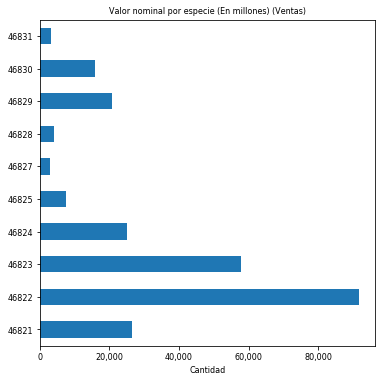

In [32]:
for i in range(len(datas)):
    #my_colors = [(x/len(datas[i]), x/len(datas[i]), 0.30) for x in range(len(datas[i]))] # <-- Quick gradient example along the Red/Green dimensions.
    ax = datas[i]["Valor nominal total (En millones)"].plot(kind = "barh",\
                            fontsize=8,figsize = (6,6), legend = False)
    ax.set_xlabel('Cantidad', fontsize=8);
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_title(titles[i], fontsize=8)
    ax.set_ylabel("")
    plt.savefig(titles[i],bbox_inches="tight")

In [33]:
for graph in titles:
    document.add_picture(graph+".png")

document.add_page_break()
document.add_paragraph("\nEl detalle de las operaciones es: ")


In [34]:
document.save('demo.docx')

In [35]:
info_entidades = pd.read_csv("reporte LECE dia ?? lecetom4.csv")

In [36]:


reload(sys)  
sys.setdefaultencoding('utf8')
# i am not sure how you are getting your data, but you said it is a
# pandas data frame




In [37]:
info_ent_ventas = info_entidades[info_entidades["Tipo de operacion"] == "Venta"][["Banco","Plazo","Cantidad de operaciones","Valor nominal total (En millones)","Monto total (En millones)","Tasa promedio"]]
info_ent_compras = info_entidades[info_entidades["Tipo de operacion"] == "Compra"][["Banco","Plazo","Cantidad de operaciones","Valor nominal total (En millones)","Monto total (En millones)","Tasa promedio"]]


In [38]:
# add a table to the end and create a reference variable
# extra row is so we can add the header row
title = document.add_paragraph("Rueda LECE - Ventas - Operaciones por entidades")
title.alignment = WD_ALIGN_PARAGRAPH.CENTER
t = document.add_table(info_ent_ventas.shape[0]+1, info_ent_ventas.shape[1], style = "Medium Shading 1 Accent 1")
# add the header rows.
for j in range(info_ent_ventas.shape[-1]):
    #t.cell(0,j).text = info_ent_ventas.columns[j]
    px = t.cell(0,j).add_paragraph(info_ent_ventas.columns[j]+"\n")
    px.alignment=WD_ALIGN_PARAGRAPH.CENTER
# add the rest of the data frame
for i in range(info_ent_ventas.shape[0]):
    for j in range(info_ent_ventas.shape[-1]):
        if ((i!= 0) & (j!= 0) & (j!= 1)):
            t.cell(i+1,j).text = "{:,}".format(info_ent_ventas.values[i,j])
        else:
            t.cell(i+1,j).text = unicode(str(info_ent_ventas.values[i,j]))
        t.cell(i+1, j).paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
        set_cell_vertical_alignment(t.cell(i+1, j))
            
            ##SECOND TABLE###
            
title = document.add_paragraph("\nRueda LECE - Compras - Operaciones por entidades")
title.alignment = WD_ALIGN_PARAGRAPH.CENTER
# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = document.add_table(info_ent_compras.shape[0]+1, info_ent_compras.shape[1], style = "Medium Shading 1 Accent 1")
# add the header rows.
for j in range(info_ent_compras.shape[-1]):
    #t.cell(0,j).text = info_ent_compras.columns[j]
    px = t.cell(0,j).add_paragraph(info_ent_compras.columns[j]+"\n")
    px.alignment=WD_ALIGN_PARAGRAPH.CENTER
# add the rest of the data frame
for i in range(info_ent_compras.shape[0]):
    for j in range(info_ent_compras.shape[-1]):
        if ((i!= 0) & (j!= 0) & (j!= 1)):
            t.cell(i+1,j).text = "{:,}".format(info_ent_compras.values[i,j])
        else:
            t.cell(i+1,j).text = unicode(str(info_ent_compras.values[i,j]))
        t.cell(i+1, j).paragraphs[0].paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
        set_cell_vertical_alignment(t.cell(i+1, j))

In [39]:
document.save('demo.docx')

In [40]:
titles = ["(Ventas) Cantidad de operaciones","(Ventas) Valor nominal total","(Ventas) Monto total","(Ventas) Tasa promedio",
         "(Compras) Cantidad de operaciones","(Compras) Valor nominal total","(Compras) Monto total","(Compras) Tasa promedio"]
datas = [info_ent_ventas[["Banco", "Cantidad de operaciones"]].set_index("Banco"), info_ent_ventas[["Banco", "Valor nominal total (En millones)"]].set_index("Banco"), info_ent_ventas[["Banco", "Monto total (En millones)"]].set_index("Banco"), info_ent_ventas[["Banco", "Tasa promedio"]].set_index("Banco"),
        info_ent_compras[["Banco", "Cantidad de operaciones"]].set_index("Banco"), info_ent_compras[["Banco", "Valor nominal total (En millones)"]].set_index("Banco"), info_ent_compras[["Banco", "Monto total (En millones)"]].set_index("Banco"), info_ent_compras[["Banco", "Tasa promedio"]].set_index("Banco")]

In [41]:

#for i in range(len(datas)):
#    my_colors = [(x/len(datas[i]), x/len(datas[i]), 0.30) for x in range(len(datas[i]))] # <-- Quick gradient example along the Red/Green dimensions.
#    ax = datas[i].plot(kind = "barh",\
#                            color = my_colors ,\
#                            fontsize=8,figsize = (8,25), legend = False)
#    ax.set_xlabel('Cantidad', fontsize=8);
#    ax.set_title(titles[i], fontsize=8)
#    ax.set_ylabel("")
#    plt.savefig(titles[i],bbox_inches="tight")

In [42]:
#for title in titles:
#    document.add_picture(title+".png")

In [43]:
document.save('demo.docx')

# Graficos en excel

## Supuse que no se tiene en cuenta el plazo para los graficos

In [44]:
info_ent_ventas2 = info_ent_ventas[["Banco","Cantidad de operaciones","Valor nominal total (En millones)","Monto total (En millones)"]].set_index("Banco")
info_ent_compras2 = info_ent_compras[["Banco","Cantidad de operaciones","Valor nominal total (En millones)","Monto total (En millones)"]].set_index("Banco")

In [45]:
info_ent_ventas2 = info_ent_ventas2.groupby(level=0).sum()
info_ent_compras2 = info_ent_compras2.groupby(level=0).sum()

In [46]:
info_ent_compras2

,Cantidad de operaciones,Valor nominal total (En millones),Monto total (En millones)
Banco,,,
BANCO CMF S.A.,1,31.4,31.2418
BANCO CREDICOOP COOP.LTDO,11,1050.0,1049.0658
BANCO DE GALICIA Y BUENOS AIRES S.A.,52,5335.0,5318.6531
BANCO DE LA PROVINCIA DE BUENOS AIRES,3,187.0,185.7381
BANCO DE LA PROVINCIA DE CORDOBA,7,401.1,399.9116
BANCO HIPOTECARIO SA,9,480.0,478.6666
BANCO INDUSTRIAL SA,6,650.0,648.8913
BANCO ITAU ARGENTINA S.A.,13,1850.0,1842.3468
BANCO PATAGONIA SA,24,2390.0,2379.9965


In [47]:
params = {'legend.fontsize': 20,
          'figure.figsize': (6,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [48]:
data = [info_ent_ventas2, info_ent_compras2]
titles = [ "Rueda LECE operaciones de venta - Cantidad de operaciones","Rueda LECE operaciones de venta - Cantidad de operaciones top 5","Rueda LECE operaciones de venta - Valor nominal total (En millones)", "Rueda LECE operaciones de venta - Valor nominal total (En millones) top 5","Rueda LECE operaciones de venta - Importe total (En millones)", "Rueda LECE operaciones de venta - Importe total (En millones) top 5",
         "Rueda LECE operaciones de compra - Cantidad de operaciones","Rueda LECE operaciones de compra - Cantidad de operaciones top 5","Rueda LECE operaciones de compra - Valor nominal total (En millones)", "Rueda LECE operaciones de compra - Valor nominal total (En millones) top 5","Rueda LECE operaciones de compra - Importe total (En millones)", "Rueda LECE operaciones de compra - Importe total (En millones) top 5"]
columns = info_ent_ventas2.columns
counter = 0
for dataframe in data:
    for column in columns:
        data_actual = dataframe[column]
        ax = data_actual.plot(kind="barh", title = titles[counter])
        ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        pylab.ylabel("")
        plt.savefig(titles[counter], bbox_inches="tight")
        counter += 1
        pylab.ylabel("")
        plt.clf()
        data_actual = data_actual.sort_values(ascending = False)
        top5 = data_actual.head(5)
        explode = (0.1,)*len(top5)
        top5.plot(kind = "pie",\
                            rot = 45, legend = False,autopct='%1.1f%%',explode=explode, title = titles[counter])
        
        pylab.ylabel("")
    
        plt.savefig(titles[counter], bbox_inches="tight")
        plt.clf()
        counter+=1

In [49]:
fechas = df["F.LIQ"].value_counts().index
fechas = fechas.sort_values()
info_tasa_por_dia = {}
for fecha in fechas:
    df_act = df[df["F.LIQ"] == fecha]
    tasa_prom = df_act["TASA"].mean()
    info_tasa_por_dia[fecha] = tasa_prom

In [50]:
#Grafico de la tasa promedio diaria
tasaDiara_df = pd.Series(info_tasa_por_dia,index=info_tasa_por_dia.keys())

In [51]:
tasaDiara_df = tasaDiara_df.sort_index()

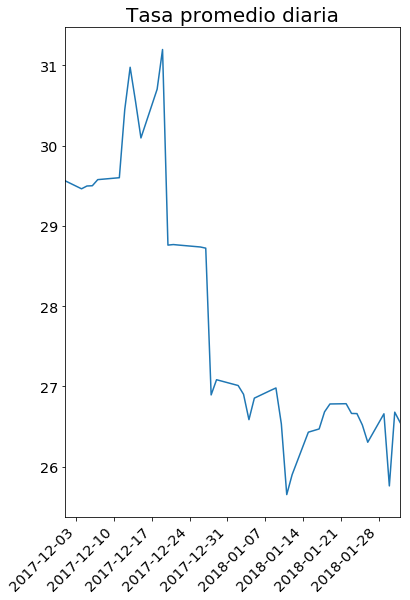

In [52]:
tasaDiara_df.plot(title = "Tasa promedio diaria", rot = 45)
plt.savefig("Rueda LECE tasa promedio diaria.png", bbox_inches="tight")

In [53]:
titles.append("Rueda LECE tasa promedio diaria")

In [54]:
from PIL import Image

In [55]:
hojas_excel=[('Cantidad de operaciones',('Rueda LECE operaciones de venta - Cantidad de operaciones','Rueda LECE operaciones de venta - Cantidad de operaciones top 5','Rueda LECE operaciones de compra - Cantidad de operaciones','Rueda LECE operaciones de venta - Cantidad de operaciones top 5')),
             ('Valor nominal total',('Rueda LECE operaciones de venta - Valor nominal total (En millones)','Rueda LECE operaciones de venta - Valor nominal total (En millones) top 5', 'Rueda LECE operaciones de compra - Valor nominal total (En millones)','Rueda LECE operaciones de compra - Valor nominal total (En millones) top 5')),
            ('Importe total',('Rueda LECE operaciones de venta - Importe total (En millones)', 'Rueda LECE operaciones de venta - Importe total (En millones) top 5', 'Rueda LECE operaciones de compra - Importe total (En millones)', 'Rueda LECE operaciones de compra - Importe total (En millones) top 5')),
            ('Tasa promedio diaria',('Rueda LECE tasa promedio diaria',))]

In [56]:
from xlwt import Workbook
w = Workbook()

In [57]:

#for title in titles:
for tupla in hojas_excel:
    position = 0
    hoja = tupla[0]
    ws = w.add_sheet(hoja)
    titles = tupla[1]
    for title in titles:
        file_in = title+".png"
        print(titles)
        print(file_in)
        img = Image.open(file_in)
        file_out = 'test1.bmp'
       # print len(img.split()) # test
        if len(img.split()) == 4:
            # prevent IOError: cannot write mode RGBA as BMP
            r, g, b, a = img.split()
            img = Image.merge("RGB", (r, g, b))
            img.save(file_out)
        else:
            img.save(file_out)

        ws.insert_bitmap(file_out, position, 0)
        position += 50
w.save('graficos.xls')